In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
turbine_data = pd.read_csv(C:\Users\Akshay Yadav\Downloads\Aksh\Data Science\Assignment\Assignment-16-Neural Networks\gas_turbines.csv")
turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
turbine_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
correlation =turbine_data.corr()

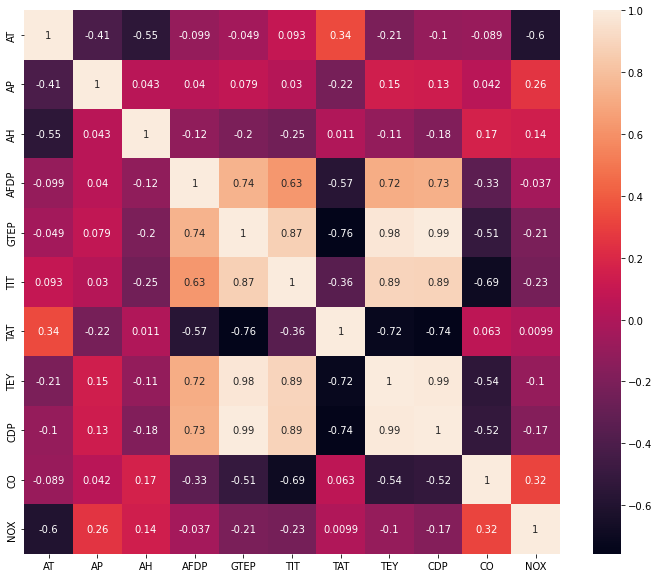

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True)
plt.show()

## Feature Selection by using Mutual Information Feature Selection


In [9]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [10]:
X=turbine_data.drop(columns='TEY')
y=turbine_data.loc[:,['TEY']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [12]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [13]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

C:\Users\Nalini P\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 0.396459
Feature 1: 0.133680
Feature 2: 0.088354
Feature 3: 0.655038
Feature 4: 1.584322
Feature 5: 1.326037
Feature 6: 0.896549
Feature 7: 1.711076
Feature 8: 0.508663
Feature 9: 0.309197


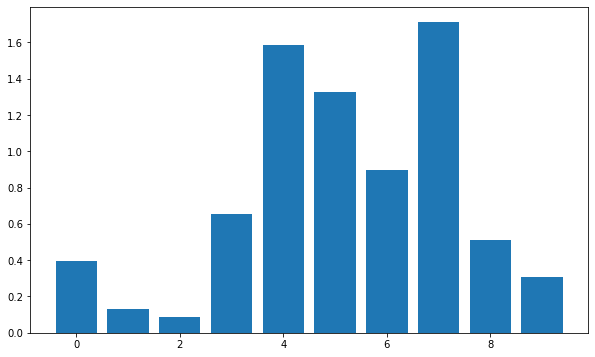

In [14]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [15]:
X=turbine_data.drop(columns=['TEY','AT','AP','AH','CO','NOX'])
X

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...
15034,3.5421,19.164,1049.7,546.21,10.400
15035,3.5059,19.414,1046.3,543.22,10.433
15036,3.4770,19.530,1037.7,537.32,10.483
15037,3.4486,19.377,1043.2,541.24,10.533


In [16]:
stand_scale=StandardScaler()

In [17]:
stand_X=stand_scale.fit_transform(X)
stand_X=pd.DataFrame(stand_X,columns=list(X.columns.values))
stand_X

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


In [18]:
X=stand_X

In [19]:
stand_y=stand_scale.fit_transform(y)
stand_y=pd.DataFrame(stand_y,columns=list(y.columns.values))
stand_y

,TEY
0,-1.231172
1,-1.229909
2,-1.230541
3,-1.229909
4,-1.229909
...,...
15034,-1.426381
15035,-1.415642
15036,-1.516089
15037,-1.481343


In [20]:
y=stand_y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10527, 5), (4512, 5), (10527, 1), (4512, 1))

In [22]:
model=Sequential()
model.add(Dense(10, input_dim=5,kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [24]:
model.fit(X_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 2s 2ms/step - loss: 0.1305 - mse: 0.1305
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0279 - mse: 0.0279
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0152 - mse: 0.0152
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0122 - mse: 0.0122
Epoch 5/100
264/264 [==============================] - 1s 3ms/step - loss: 0.0110 - mse: 0.0110
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0104 - mse: 0.0104
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0098 - mse: 0.0098
Epoch 8/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0095 - mse: 0.0095
Epoch 9/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0092 - mse: 0.0092
Epoch 10/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0091 - mse: 0.0091
Epoch 11/100
264/264 [=================

In [25]:
model.evaluate(X_test,y_test)

141/141 [==============================] - 0s 2ms/step - loss: 0.0069 - mse: 0.0069


[0.006882290821522474, 0.006882290821522474]

## Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [26]:
import tensorflow.keras.optimizers
from keras.layers import Dropout
from keras.optimizers import adam_v2

In [27]:
X = X.iloc[0:500,:]

In [28]:
y = y.iloc[0:500]

In [29]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y, test_size=0.3, random_state=1)
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((350, 5), (150, 5), (350, 1), (150, 1))

In [30]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train_1, y_train_1)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

C:\Users\NALINI~1\AppData\Local\Temp/ipykernel_7384/3187717600.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.082 total time=   2.0s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.122 total time=   1.8s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, ne

## Applying best parameters values to the final model


In [41]:
final_model = Sequential()
final_model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dense(1,activation = 'linear'))

In [42]:
final_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [43]:
final_model.fit(X_train,y_train, epochs=100, batch_size=20)

Epoch 1/100
527/527 [==============================] - 3s 3ms/step - loss: 0.2161 - mse: 0.2161
Epoch 2/100
527/527 [==============================] - 1s 3ms/step - loss: 0.0243 - mse: 0.0243
Epoch 3/100
527/527 [==============================] - 1s 3ms/step - loss: 0.0232 - mse: 0.0232
Epoch 4/100
527/527 [==============================] - 1s 3ms/step - loss: 0.0221 - mse: 0.0221
Epoch 5/100
527/527 [==============================] - 1s 2ms/step - loss: 0.0208 - mse: 0.0208
Epoch 6/100
527/527 [==============================] - 1s 2ms/step - loss: 0.0194 - mse: 0.0194
Epoch 7/100
527/527 [==============================] - 1s 2ms/step - loss: 0.0179 - mse: 0.0179
Epoch 8/100
527/527 [==============================] - 1s 2ms/step - loss: 0.0165 - mse: 0.0165
Epoch 9/100
527/527 [==============================] - 1s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 10/100
527/527 [==============================] - 1s 3ms/step - loss: 0.0148 - mse: 0.0148
Epoch 11/100
527/527 [=================

In [44]:
final_model.evaluate(X_test,y_test)

141/141 [==============================] - 1s 2ms/step - loss: 0.0134 - mse: 0.0134


[0.013404415920376778, 0.013404415920376778]